# Plots

In [5]:
import os
import re
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator

In [11]:
# Change
run_dir = 'convergence/'
file_name = '25-29-4-1_488_history.json'
split = re.split('_|\.', file_name)
instance_name = split[0]
random_seed = split[1]

# Constant
project_path = os.path.dirname(os.path.abspath('.'))
directory_path = '/output/solstorm/alns/plots/'
file_path = project_path + directory_path + run_dir + file_name

# Load file
with open(file_path) as file:
    history_json = json.load(file)

In [12]:
def get_xy(heuristic_key):
    iter_to_weight = history_json['heuristic_to_iteration_to_weight'][heuristic_key]
    xy = [(int(k), v) for k, v in iter_to_weight.items()]
    xy.sort()
    x = [tup[0] for tup in xy]
    y = [tup[1] for tup in xy]
    return x, y

## Convergence

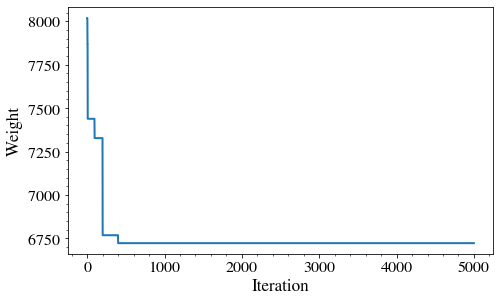

In [13]:
iter_to_obj = history_json['iteration_to_objective']

xy = [(int(k), v) for k, v in iter_to_obj.items()]
xy.sort()
x = [tup[0] for tup in xy]
y = [tup[1] for tup in xy]

plt.style.use(project_path + '/plot/PaperDoubleFig.mplstyle')
fig, ax = plt.subplots()
ax.set_xlabel('Iteration')
ax.set_ylabel('Weight')
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.major.formatter._useMathText = True
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
plt.savefig(f'graphs/{instance_name}-{random_seed}_convergence.jpg', dpi=400)
plt.plot(x, y)

## Weights

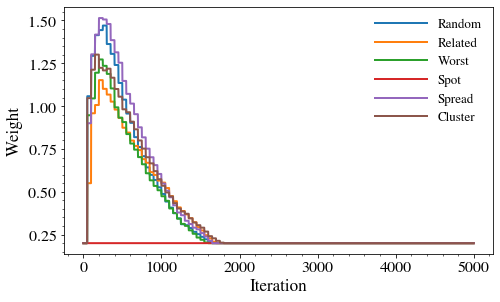

In [14]:
random_removal_key = 'random_removal'
related_removal_key = 'related_removal'
worst_removal_key = 'worst_removal'
spot_removal_key = 'spot_removal'
spread_removal_key = 'spread_removal'
cluster_removal_key = 'cluster_removal'
greedy_insertion_key = 'greedy_insertion'
regret_insertion_key = 'regret_insertion'
max_penalty_cost_insertion_key = 'max_penalty_cost_insertion'
max_order_size_insertion_key = 'max_order_size_insertion'

random_removal_x, random_removal_y = get_xy(random_removal_key)
related_removal_x, related_removal_y = get_xy(related_removal_key)
worst_removal_x, worst_removal_y = get_xy(worst_removal_key)
spot_removal_x, spot_removal_y = get_xy(spot_removal_key)
spread_removal_x, spread_removal_y = get_xy(spread_removal_key)
cluster_removal_x, cluster_removal_y = get_xy(cluster_removal_key)

plt.style.use(project_path + '/plot/PaperDoubleFig.mplstyle')
fig, ax = plt.subplots()
ax.set_xlabel('Iteration')
ax.set_ylabel('Weight')
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.major.formatter._useMathText = True
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
# ax.locator_params(integer=True)
plt.plot(random_removal_x, random_removal_y, label='Random')
plt.plot(related_removal_x, related_removal_y, label='Related')
plt.plot(worst_removal_x, worst_removal_y, label='Worst')
plt.plot(spot_removal_x, spot_removal_y, label='Spot')
plt.plot(spread_removal_x, spread_removal_y, label='Spread')
plt.plot(cluster_removal_x, cluster_removal_y, label='Cluster')
ax.legend(frameon=False, loc='best', ncol=1, handlelength=4)
plt.savefig(f'graphs/{instance_name}-{random_seed}_weights_destroy.jpg', dpi=400)
plt.show()

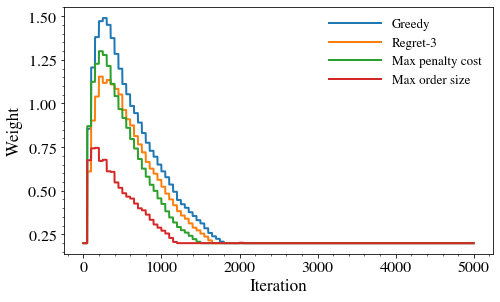

In [15]:
greedy_insertion_x, greedy_insertion_y = get_xy(greedy_insertion_key)
regret_insertion_x, regret_insertion_y = get_xy(regret_insertion_key)
max_penalty_cost_insertion_x, max_penalty_cost_insertion_y = get_xy(max_penalty_cost_insertion_key)
max_order_size_insertion_x, max_order_size_insertion_y = get_xy(max_order_size_insertion_key)

plt.style.use(project_path + '/plot/PaperDoubleFig.mplstyle')
fig, ax = plt.subplots()
ax.set_xlabel('Iteration')
ax.set_ylabel('Weight')
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.major.formatter._useMathText = True
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
plt.plot(greedy_insertion_x, greedy_insertion_y, label='Greedy')
plt.plot(regret_insertion_x, regret_insertion_y, label='Regret-3')
plt.plot(max_penalty_cost_insertion_x, max_penalty_cost_insertion_y, label='Max penalty cost')
plt.plot(max_order_size_insertion_x, max_order_size_insertion_y, label='Max order size')
ax.legend(frameon=False, loc='best', ncol=1, handlelength=4)
plt.savefig(f'graphs/{instance_name}-{random_seed}_weights_insertion.jpg', dpi=400)
plt.show()